<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER/EVALUACION/CONDORI_CANCAPA_YOEL_BRIAN_EVA_PARTE01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Análisis y Preparación de Datos


2. Modelado Predictivo con TensorFlow Keras

In [31]:
# Instalar las bibliotecas necesarias
!pip install tensorflow -q
!pip install seaborn -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar los datasets
data1 = pd.read_csv('index_1.csv')
data2 = pd.read_csv('index_2.csv')

# Unir los datasets
data = pd.concat([data1, data2], ignore_index=True)

# Verificar los primeros registros
print(data.head())



         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


            money
count  3898.00000
mean     31.38060
std       5.06461
min      15.00000
25%      27.92000
50%      32.82000
75%      35.76000
max      40.00000


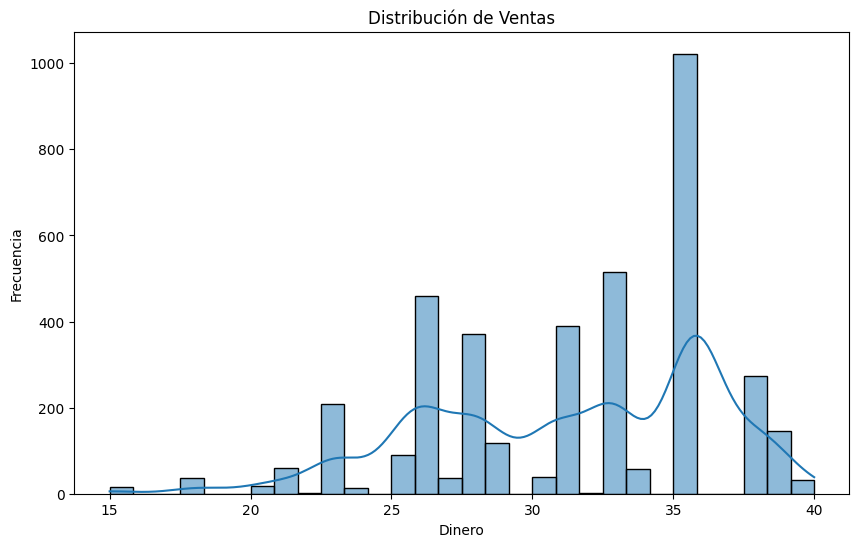

In [32]:
# Resumen estadístico
print(data.describe())

# Visualización de la distribución de 'money'
plt.figure(figsize=(10, 6))
sns.histplot(data['money'], bins=30, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Dinero')
plt.ylabel('Frecuencia')
plt.show()


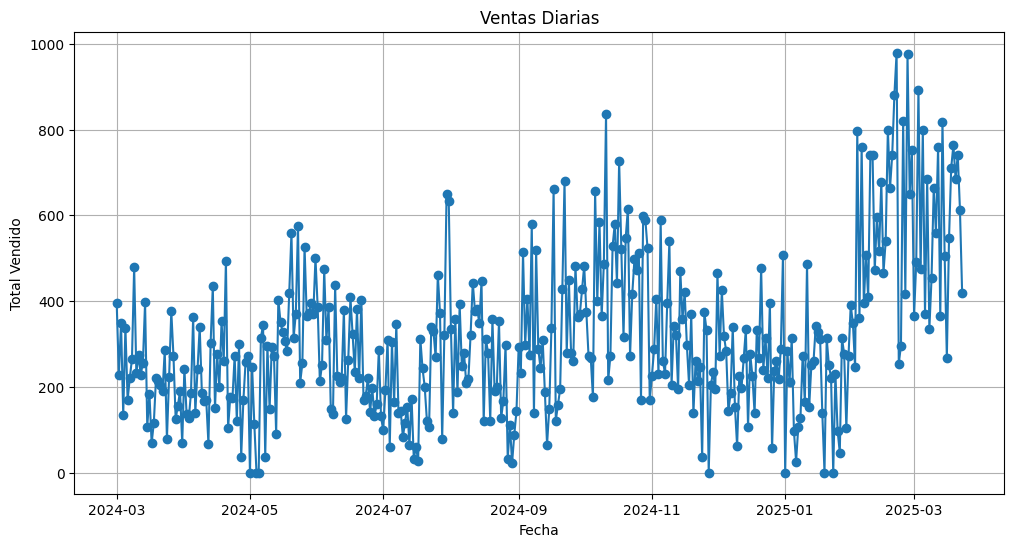

In [33]:
# Convertir fecha y visualizar
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
daily_sales = data.resample('D').sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['money'], marker='o')
plt.title('Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Total Vendido')
plt.grid()
plt.show()

In [34]:
# Verificar las columnas del DataFrame
print(data.columns)


Index(['datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')


In [35]:
# Celda 6: Ingeniería de características
# Verificar si la columna 'date' existe
if 'date' in data.columns:
    # Extraer características temporales
    data['month'] = data['date'].dt.month
    data['day_of_week'] = data['date'].dt.dayofweek
    data['hour'] = data['date'].dt.hour

    # Crear cantidad_total_vendida_no_dia
    data['cantidad_total_vendida_no_dia'] = data.groupby(data['date'].dt.date)['money'].transform('sum')

    # Codificar variables categóricas
    data = pd.get_dummies(data, columns=['coffee_name'], drop_first=True)

    # Verificar los cambios
    print(data.head())
else:
    print("La columna 'date' no se encuentra en el DataFrame.")


La columna 'date' no se encuentra en el DataFrame.


In [36]:
data1 = pd.read_csv('index_1.csv', sep=',')  # Cambia el separador si es necesario
data2 = pd.read_csv('index_2.csv', sep=',')  # Cambia el separador si es necesario


In [37]:
# Celda 7: División de datos
# Verificar las columnas del DataFrame
print(data.columns)

# Definir características y objetivo
columns_to_drop = ['money', 'cantidad_total_vendida_no_dia', 'date']
# Filtrar las columnas que realmente existen
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]

X = data.drop(columns=existing_columns_to_drop)
y = data['cantidad_total_vendida_no_dia'] if 'cantidad_total_vendida_no_dia' in data.columns else None

# Verificar si y no es None
if y is not None:
    # Dividir los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]}')
    print(f'Tamaño del conjunto de prueba: {X_test.shape[0]}')
else:
    print("La columna 'cantidad_total_vendida_no_dia' no se encuentra en el DataFrame.")


Index(['datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')
La columna 'cantidad_total_vendida_no_dia' no se encuentra en el DataFrame.


In [38]:
print(data.head())  # Muestra las primeras filas del DataFrame


                           datetime cash_type                 card  money  \
date                                                                        
2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

              coffee_name  
date                       
2024-03-01          Latte  
2024-03-01  Hot Chocolate  
2024-03-01  Hot Chocolate  
2024-03-01      Americano  
2024-03-01          Latte  


In [39]:
# Celda 7: División de datos
# Verificar las columnas del DataFrame
print(data.columns)

# Definir características y objetivo
columns_to_drop = ['money', 'cantidad_total_vendida_no_dia', 'date']
# Filtrar las columnas que realmente existen
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]

X = data.drop(columns=existing_columns_to_drop)
y = data['cantidad_total_vendida_no_dia'] if 'cantidad_total_vendida_no_dia' in data.columns else None

# Verificar si y no es None
if y is not None:
    # Dividir los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]}')
    print(f'Tamaño del conjunto de prueba: {X_test.shape[0]}')
else:
    print("La columna 'cantidad_total_vendida_no_dia' no se encuentra en el DataFrame.")


Index(['datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')
La columna 'cantidad_total_vendida_no_dia' no se encuentra en el DataFrame.


In [40]:
print(type(y_train_coffee))
print(y_train_coffee)





<class 'pandas.core.frame.DataFrame'>
Empty DataFrame
Columns: []
Index: [2024-11-16 00:00:00, 2025-01-13 00:00:00, 2024-10-10 00:00:00, 2024-08-10 00:00:00, 2024-05-30 00:00:00, 2024-10-10 00:00:00, 2024-11-17 00:00:00, 2024-08-07 00:00:00, 2024-03-26 00:00:00, 2024-04-13 00:00:00, 2025-02-02 00:00:00, 2024-07-31 00:00:00, 2025-02-05 00:00:00, 2024-07-01 00:00:00, 2024-12-03 00:00:00, 2024-10-07 00:00:00, 2024-06-03 00:00:00, 2024-11-03 00:00:00, 2024-05-06 00:00:00, 2024-08-11 00:00:00, 2024-04-03 00:00:00, 2024-10-19 00:00:00, 2024-10-10 00:00:00, 2025-01-11 00:00:00, 2025-02-10 00:00:00, 2024-11-12 00:00:00, 2025-03-19 00:00:00, 2025-03-06 00:00:00, 2024-12-21 00:00:00, 2024-06-07 00:00:00, 2024-07-26 00:00:00, 2024-10-20 00:00:00, 2024-11-09 00:00:00, 2024-05-11 00:00:00, 2024-10-25 00:00:00, 2024-04-26 00:00:00, 2024-11-05 00:00:00, 2024-07-30 00:00:00, 2024-12-03 00:00:00, 2024-05-09 00:00:00, 2024-09-28 00:00:00, 2024-04-26 00:00:00, 2025-02-21 00:00:00, 2024-11-16 00:00:00, 20

In [41]:
# Convertir todas las columnas a numéricas, forzando errores a NaN
X_train_coffee = X_train_coffee.apply(pd.to_numeric, errors='coerce')

# Eliminar filas con NaN
X_train_coffee = X_train_coffee.dropna()
y_train_coffee = y_train_coffee[X_train_coffee.index]  # Asegúrate de que y coincida con X
